In [1]:
import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import SGD, L_BFGS
from neural_stylization.util.build_callback import build_callback
from neural_stylization.util.img_util import load_image

Using TensorFlow backend.


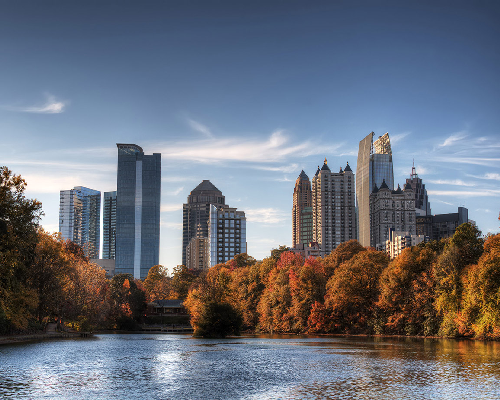

In [4]:
# the shape to load content, style, and ouptut as (w, h)
# None implies the size of the content will be used
image_size = 500, 400
# the location of the base content image
content_path = 'img/content/piedmont-park.jpg'
# load and view the image with its dimensions
load_image(content_path, image_size)

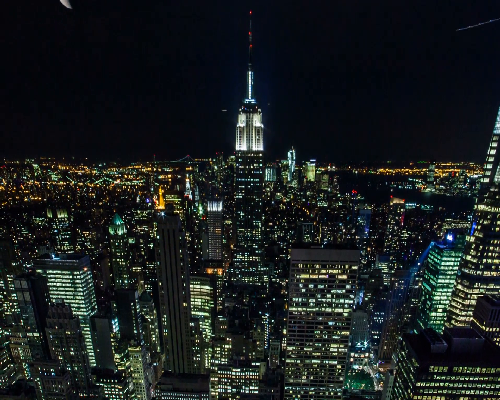

In [5]:
# the location of the base style image
style_path = 'img/content/new-york.png'
# load and view the image with its dimensions
load_image(style_path, image_size)

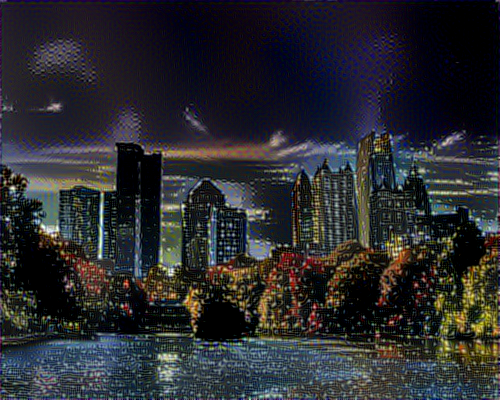

100%|██████████| 50/50 [03:27<00:00,  4.16s/it]


In [6]:
sty = Stylizer(
    content_layer_name='block3_conv2', 
    content_weight=1, 
    style_weight=5e2,
    total_variation_weight=1e-3
)

seated_nudes = sty(
    content_path=content_path,
    style_path=style_path,
    optimize=L_BFGS(max_evaluations=15),
    iterations=50,
    image_size=image_size,
    callback=build_callback('build/transfer/atlanta/piedmont-park')
)